Columns in dataset: ['total_spent', 'avg_purchase_value', 'visits_per_month', 'buyer_type']

Sample Data:
   total_spent  avg_purchase_value  visits_per_month      buyer_type
0  4007.982067          235.560678                 3  bargain_hunter
1  3117.968387          313.883912                13  bargain_hunter
2  4232.062646          122.280804                15  bargain_hunter
3   577.820196          470.747406                20   premium_buyer
4  2839.005107           23.207422                19  bargain_hunter

Model Evaluation Metrics:
Accuracy : 0.53
Precision: 0.14
Recall   : 0.11


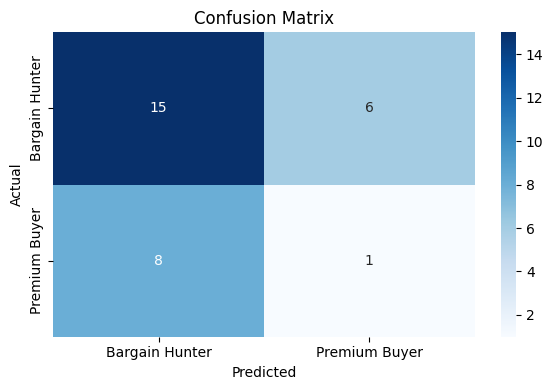

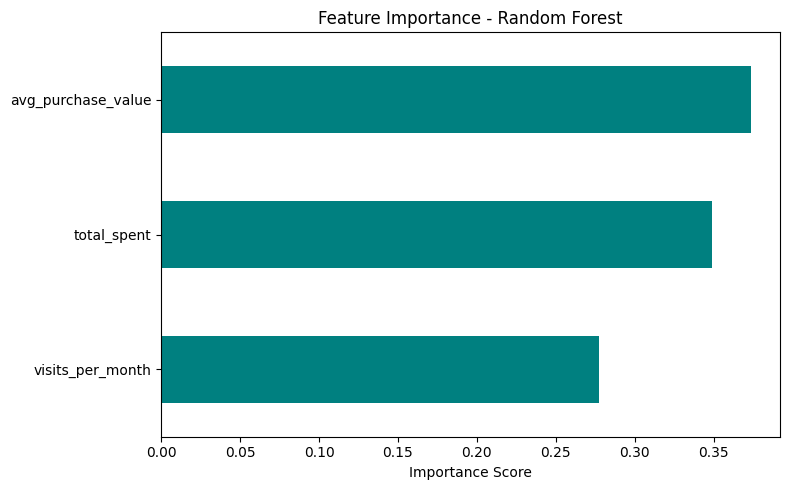

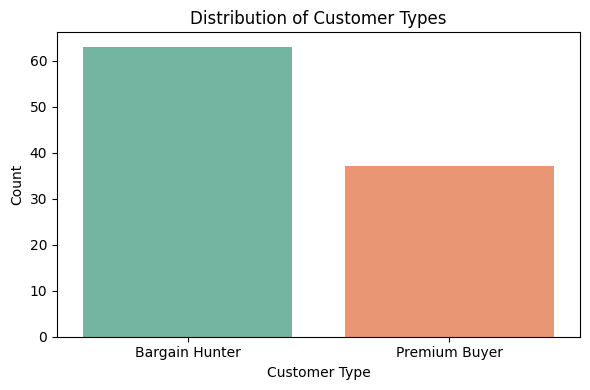

In [11]:
# Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt

# -------------------------------
# Step 1: Load and clean the dataset
# -------------------------------

# Load the CSV file (ensure it's in the working directory or provide full path)
df = pd.read_csv("/content/customer_behavior.csv")

# Remove extra spaces or newline characters from column names
df.columns = df.columns.str.strip()

# Print the column names to verify
print("Columns in dataset:", df.columns.tolist())

# Display first few rows of data
print("\nSample Data:")
print(df.head())

# -------------------------------
# Step 2: Prepare target variable
# -------------------------------

# Map target labels to numeric values: 0 for bargain_hunter, 1 for premium_buyer
df['buyer_type'] = df['buyer_type'].map({'bargain_hunter': 0, 'premium_buyer': 1})

# Check if mapping introduced any NaN values (due to typos or unrecognized classes)
if df['buyer_type'].isnull().any():
    raise ValueError("Error: Unknown values found in 'buyer_type'. Please check your data.")

# -------------------------------
# Step 3: Feature-target split
# -------------------------------

# Input features (exclude the target column)
X = df.drop(columns=['buyer_type'])

# Target column
y = df['buyer_type']

# -------------------------------
# Step 4: Split data into training and testing sets
# -------------------------------

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# -------------------------------
# Step 5: Train the Random Forest classifier
# -------------------------------

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# -------------------------------
# Step 6: Make predictions and evaluate
# -------------------------------

y_pred = clf.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("\nModel Evaluation Metrics:")
print(f"Accuracy : {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall   : {recall:.2f}")

# -------------------------------
# Step 7: Plot confusion matrix heatmap
# -------------------------------

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Bargain Hunter', 'Premium Buyer'],
            yticklabels=['Bargain Hunter', 'Premium Buyer'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# -------------------------------
# Step 8: Plot feature importance
# -------------------------------

feature_importances = pd.Series(clf.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=True)

plt.figure(figsize=(8, 5))
feature_importances.plot(kind='barh', color='teal')
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

# -------------------------------
# Step 9: Count plot of buyer types
# -------------------------------

plt.figure(figsize=(6, 4))
sns.countplot(x='buyer_type', data=df, palette='Set2', hue='buyer_type', legend=False)  # Corrected
plt.xticks(ticks=[0, 1], labels=['Bargain Hunter', 'Premium Buyer'])
plt.title('Distribution of Customer Types')
plt.xlabel('Customer Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()
